<a href="https://colab.research.google.com/github/krimoe/handwritten-digit-recognition-/blob/main/MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86.3 MB 36 kB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 3.8 MB 29.3 MB/s 
     |████████████████████████████████| 449 kB 50.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5d7ef8fd6e1ab2204862f45c4408caeb72f624c0b8f18c082aff07b478f75c90
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uni

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

Load the dataset and split into test and train data

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Check the Shape of the data

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Plot one of the digits:

In [ ]:
import seaborn as sns
import random

In [ ]:
random_index= random.randint(0,5999)

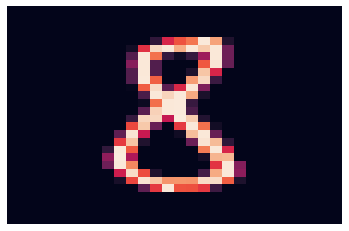

In [ ]:
sns.heatmap(x_train[random_index], cbar=False, xticklabels=False, yticklabels=False)

Reshape data so it is just a single line per handwritten digit

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Normalize

Set the correct data type in order to normalize the data

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices

In [ ]:
print(y_train[100])

5


We need to do the one-hot encoding (adding statistical dummy variables to represent classes)

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
print(y_train[100])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Start with a very simple model (not need Convolutional Neural Network)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Lets compile it using the categorical_crossentropy since this is a classification problem

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

Do the training

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=1)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 456us/sample - loss: 0.2236 - accuracy: 0.9343
Epoch 2/20
60000/60000 [==============================] - 19s 321us/sample - loss: 0.1309 - accuracy: 0.9666
Epoch 3/20
60000/60000 [==============================] - 18s 307us/sample - loss: 0.1223 - accuracy: 0.9724
Epoch 4/20
60000/60000 [==============================] - 18s 299us/sample - loss: 0.1131 - accuracy: 0.9752
Epoch 5/20
60000/60000 [==============================] - 18s 300us/sample - loss: 0.1061 - accuracy: 0.9777
Epoch 6/20
60000/60000 [==============================] - 20s 336us/sample - loss: 0.1058 - accuracy: 0.9794
Epoch 7/20
60000/60000 [==============================] - 20s 330us/sample - loss: 0.1026 - accuracy: 0.9806
Epoch 8/20
60000/60000 [==============================] - 21s 345us/sample - loss: 0.1033 - accuracy: 0.9809
Epoch 9/20
60000/60000 [==============================] - 20s 341us/sample - loss: 0.1050 - accuracy: 0.9

Evaluate the quality of the model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22293743253336634
Test accuracy: 0.9828
